## Assignment 1B - Multilayer Perceptrons (MLPs)

### Please include your name below
__Student name:__ Szu-Yeu, Hu

### Data and preliminaries
You will be using the same data that you used from assignment 1A. To load the data, run the following command:

In [81]:
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_X = np.load("train_X.npy")
train_y = np.load("train_y.npy")
val_X = np.load("val_X.npy")
val_y = np.load("val_y.npy")

## Reshape the ys to have a specified second index 
train_y = train_y.reshape((len(train_y),1))
val_y = val_y.reshape((len(val_y),1))

train_X = np.hstack((np.ones((len(train_X),1)),train_X))
val_X = np.hstack((np.ones((len(val_X),1)),val_X))

### Question 2.1 (10 points)
Fill in the `forward_pass` function below. __No loops__ are allowed, use only matrix, vector, or elementwise operations. Note that this function returns __two__ items `p, H`. `p` is the normal forward pass probabilities, while `H` is the hidden unit activations, which will be needed for the backward pass.

In [82]:
## Fill in this funtion and have it return the correct result
def forward_pass(X,w_h,w_o):
    """
    Function arguments:
    X - Matrix input features
    w_h - Matrix of weights in the hidden layer
    w_o - Vector of weights in the output layer
    Returns:
    p - Vector of probabilities from the network's output layer
    H - Matrix of activations in the hidden layer after the ReLU has been applied
    """
    p = None
    H = None
    
    h = X.dot(w_h)
    H = np.maximum(h, 0)
    o = H.dot(w_o)
    p = 1/(1 + np.exp(-o)) 
    return p, H

### Question 2.2 (10 points)
Fill in the `backward_pass_output` and `backward_pass_hidden` functions below. __No loops__ are allowed, use only matrix, vector, or elementwise operations. You should be computing the average gradient, instead of the sum of gradients in the backward pass. 

In [83]:
def backward_pass_output(y,X,p,H):
    """
    Function arguments:
    y - Vector of lables
    X - Matrix input features
    p - Vector of probabilities from the network's output layer
    H - Matrix of activations in the hidden layer after the ReLU has been applied
    Returns
    g_w_output - Vector of gradients for weights in output layer
    """
    ## compute g_w_output
    g_w_output = H.T.dot(p - y)/H.shape[0]
    return g_w_output

def backward_pass_hidden(y,X,p,H,w_o):
    """
    Function arguments:
    y - Vector of lables
    X - Matrix input features
    p - Vector of probabilities from the network's output layer
    H - Matrix of activations in the hidden layer after the ReLU has been applied
    w_o - Vector of output layer weights
    Returns
    g_w_hidden - Matrix of gradients for weights in hidden layer
    """
    ## compute g_w_hidden
    dH = (p-y).dot(w_o.T)
    dH = np.where(H > 0, dH, 0)
    g_w_hidden = X.T.dot(dH)/X.shape[0]
    
    return g_w_hidden

### Question 2.3 (20 points)
Train your perceptron using the `forward_pass`, `backward_pass_output`, and `backward_pass_hidden` functions for 1,000 iterations. Report the loss, accuracy, AUC for both the training and validation data sets. Plot the training and validation loss vs the iteration number. Modify this cell to include your your results and commentary on your approach. 

---

My learning rate was:

| Metric        | Training      | Validation  |
| ------------- | ------------- |-------------|
| Loss          |      0.2159      |      0.3207    |
| Accuracy      | 91.14%      |      87.80%    |
| AUC           | 0.9283      |      0.8332    |


Please include the required discussion points here.

After adding an addition hidden layer, the training accuracy improved from 88% to 91%, but the validation accuracy did not improved much. From the training-validation loss plot, we can see the loss of validation set became larger with more iteration, and the gap between two lines gradually enlarged. It shows that the more complex model cause the data to be overfitting, therefore it only improves on training set, not on validation set.

In [100]:
## Your code goes here
t = 128
#w_h = np.random.randn(train_X.shape[1],t) * np.sqrt(2.0/train_X.shape[1])
#w_o = np.random.randn(t,1) * np.sqrt(2.0/t)

w_h = np.random.normal(scale=0.01, size = (train_X.shape[1], t))
w_o = np.random.normal(scale=0.01, size = (t, 1))

#w_h = np.zeros((train_X.shape[1],t),dtype= 'float32')
#w_o = np.zeros((t,1), dtype='float32')
train_loss_list = []
val_loss_list = []
accuracy_list = []
n_iterations = 1000
lr = 0.1

for i in range(n_iterations):
    train_p, train_H = forward_pass(train_X,w_h,w_o)
    val_p, _ = forward_pass(val_X,w_h, w_o)
    
    train_loss = np.mean(-(train_y*np.log(train_p + 1e-6) + (1- train_y)*np.log(1 - train_p + 1e-6)))
    val_loss = np.mean(-(val_y*np.log(val_p + 1e-6) + (1- val_y) * np.log(1 - val_p + 1e-6)))

    gw_o = backward_pass_output(train_y,train_X,train_p,train_H)
    gw_h = backward_pass_hidden(train_y,train_X,train_p,train_H,w_o)
    
    w_o = w_o - lr * gw_o
    w_h = w_h - lr * gw_h
    
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    
    

In [93]:
training = False
train_p,_,_ = forward_pass_dropout(train_X,w_h,w_o,dropout_prob,training)
train_pred = np.round(train_p)
train_acc = np.sum(train_y == train_pred)/len(train_y)
val_p,_,_= forward_pass_dropout(val_X,w_h,w_o,dropout_prob,training)
val_pred = np.round(val_p)
val_acc = np.sum(val_y == val_pred)/len(val_y)

train_auc = roc_auc_score(train_y, train_p)
val_auc = roc_auc_score(val_y, val_p)

print("training loss:" + str(train_loss_list[-1]))
print("validation loss" + str(val_loss_list[-1]))
print("training accuracy:" + str(train_acc))
print("validation accuracy:" + str(val_acc))
print("training AUC:" + str(train_auc))
print("validation AUC:" + str(val_auc))

training loss:0.215910230198937
validation loss0.32065404428554084
training accuracy:0.9113820584428853
validation accuracy:0.8780260707635009
training AUC:0.9283417287205341
validation AUC:0.8332092968117124


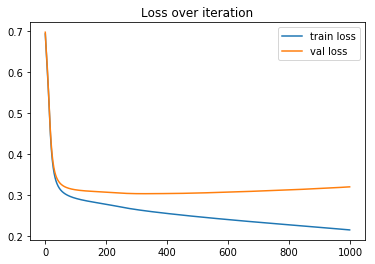

In [94]:
plt.figure()
plt.plot(range(n_iterations),train_loss_list)
plt.plot(range(n_iterations),val_loss_list)
plt.title("Loss over iteration")
plt.legend(["train loss","val loss"])

### Question 2.4 (10 points)
Repeat question 2.3 but include dropout between the hidden and output layers. Show your code in the cell below. Fill out the table and values in this cell and include the discussion comparing this model to the previous model.

---

My learning rate was: 0.1
<br/>
My optimal value for $\lambda$ was: 

Results for the __best__ model are shown below:


| Metric        | Training      | Validation  |
| ------------- | ------------- |-------------|
| Loss          |      0.2529      |      0.3231    |
| Accuracy      | 86.4&%      |      86.47%    |
| AUC           | 0.9136      |      0.8365    |


Discussion points included below:
After adding dropout layer with dropout rate 0.5, the performance on training and validation set both became worse, both of the accuracy are about 86%, but the AUC is roughly the same. Comparing with the model without dropout, the main difference is that the validation loss do not goes up significantly as before. It indicated that dropout make the model less overfit. It could potentially improve the overall performance with different learning rate and dropout rate.

In [96]:
## Define your new functions below
def forward_pass_dropout(X,w_h,w_o,dropout_prob,training=True):
    """
    Function arguments:
    X - Matrix input features
    w_h - Matrix of weights in the hidden layer
    w_o - Vector of weights in the output layer
    training - Boolean flag indicating whether dropout should be on or off
    Returns:
    p - Vector of probabilities from the network's output layer
    H - Matrix of activations in the hidden layer after the ReLU has been applied
    dropout_mask - Matrix of binary values indicating which activations have been dropped
    """
    p = None
    H = None
    dropout_mask = None
    
    h = X.dot(w_h)
    H = np.maximum(h, 0)
    dropout_mask = np.where(np.random.rand(*H.shape) < dropout_prob, 0, 1)
    if training == True:
        H_d = H * dropout_mask
    else:
        H_d = H * (1 - dropout_prob)
    o = H_d.dot(w_o)
    p = 1/(1+np.exp(-o))
    return p, H, dropout_mask

def backward_pass_hidden_dropout(y,X,p,H,w_o,dropout_mask):
    """
    Function arguments:
    y - Vector of lables
    X - Matrix input features
    p - Vector of probabilities from the network's output layer
    H - Matrix of activations in the hidden layer after the ReLU has been applied
    w_o - Vector of output layer weights
    dropout_mask - Matrix of binary values indicating which activations have been dropped
    Returns:
    g_w_hidden - Matrix of gradients for weights in hidden layer
    """    
    dH_d = (p-y).dot(w_o.T)
    dH = dH_d * dropout_mask
    dH = np.where(H > 0, dH, 0)
    g_w_hidden = X.T.dot(dH)/X.shape[0]
    return g_w_hidden

In [97]:
## your training loop goes here
## Your code goes here
t = 128

#w_h = np.random.randn(train_X.shape[1],t) * np.sqrt(2.0/train_X.shape[1])
#w_o = np.random.randn(t,1) * np.sqrt(2.0/t)

w_h = np.random.normal(scale=0.01, size = (train_X.shape[1], t))
w_o = np.random.normal(scale=0.01, size = (t, 1))

#w_h = np.zeros((train_X.shape[1],t),dtype= 'float32')
#w_o = np.zeros((t,1), dtype='float32')
train_loss_list = []
val_loss_list = []
accuracy_list = []
n_iterations = 1000
lr = 0.1
dropout_prob = 0.5

for i in range(n_iterations):
    training = True
    train_p, train_H, dropout_mask = forward_pass_dropout(train_X,w_h,w_o,dropout_prob,training)
    
    gw_o = backward_pass_output(train_y,train_X,train_p,train_H)
    gw_h = backward_pass_hidden_dropout(train_y,train_X,train_p,train_H,w_o,dropout_mask)
    
    training = False
    
    val_p, _ , _ , = forward_pass_dropout(val_X,w_h,w_o,dropout_prob,training)
    train_loss = np.mean(-(train_y*np.log(train_p+1e-8) + (1-train_y)*np.log(1-train_p+1e-8)))
    val_loss = np.mean(-(val_y*np.log(val_p+1e-8) + (1-val_y)*np.log(1-val_p+1e-8)))

     
    w_o = w_o - lr * gw_o
    w_h = w_h - lr * gw_h
    
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    

In [98]:
training = False
train_p,_,_ = forward_pass_dropout(train_X,w_h,w_o,dropout_prob,training)
train_pred = np.round(train_p)
train_acc = np.sum(train_y == train_pred)/len(train_y)
val_p,_,_= forward_pass_dropout(val_X,w_h,w_o,dropout_prob,training)
val_pred = np.round(val_p)
val_acc = np.sum(val_y == val_pred)/len(val_y)

train_auc = roc_auc_score(train_y, train_p)
val_auc = roc_auc_score(val_y, val_p)

print("training loss:" + str(train_loss_list[-1]))
print("validation loss" + str(val_loss_list[-1]))
print("training accuracy:" + str(train_acc))
print("validation accuracy:" + str(val_acc))
print("training AUC:" + str(train_auc))
print("validation AUC:" + str(val_auc))

training loss:0.2524356344387477
validation loss0.32390687124676726
training accuracy:0.8646549962536612
validation accuracy:0.8646803227808815
training AUC:0.9134495736387671
validation AUC:0.8348607388186016


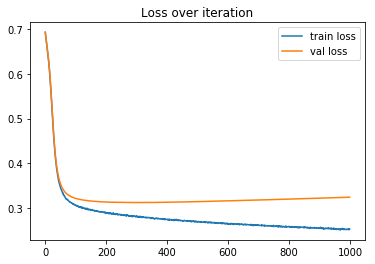

In [99]:
plt.plot(range(n_iterations),train_loss_list)
plt.plot(range(n_iterations),val_loss_list)
plt.title("Loss over iteration")
plt.legend(["train loss","val loss"])